# Import Module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')


from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Import Dataset

In [2]:
data=pd.read_csv('Twitter Sentiments.csv')
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
# dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


# Preprocessing Steps

In [4]:
# Lowercasing 
data = data.apply(lambda x: x.astype(str).str.lower())

In [6]:
# Removing HTML tags
import re
def remove_html_tags(text):
    pattern=re.compile('<.*?>')
    return pattern.sub(r' ',str(text))

In [7]:
data['tweet']=data['tweet'].apply(remove_html_tags)

In [8]:
# Remove pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [9]:
# remove twitter handles (@user)
data['clean_tweet'] = np.vectorize(remove_pattern)(data['tweet'], "@[\w]*")

In [10]:
data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [11]:
# Removing punctuation,characters and numbers
data['clean_tweet'] = data['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [14]:
# Demoji(replacing emoji with its meaning)
from emoji import demojize
data['clean_tweet']=data['clean_tweet'].apply(demojize)

In [15]:
data['clean_tweet']

0          when a father is dysfunctional and is so sel...
1          thanks for #lyft credit i can t use cause th...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide  society now    #motivation
                               ...                        
31957    ate  isz that youuu                           ...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960     #sikh #temple vandalised in in #calgary  #wso...
31961                          thank you  for you follow  
Name: clean_tweet, Length: 31962, dtype: object

In [16]:
# Removing stop words
def remove_stopwords(text):
    new_text=[]
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x=new_text[:]
    new_text.clear()
    return " ".join(x)

In [19]:
from nltk.corpus import stopwords
sw_list = stopwords.words('english')

data['clean_tweet'] = data['clean_tweet'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

In [20]:
data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit use cause offer wheelchair...
2,3,0,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,#model love u take u time ur
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [21]:
# Tokenize

data['clean_tweet']=data['clean_tweet'].apply(lambda X: (str(X).split()))

In [22]:
data.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,"[father, dysfunctional, selfish, drags, kids, ..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thanks, #lyft, credit, use, cause, offer, whe..."
2,3,0,bihday your majesty,"[bihday, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[#model, love, u, take, u, time, ur]"
4,5,0,factsguide: society now #motivation,"[factsguide, society, #motivation]"


In [23]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
def lemmatize_word(text):
    lemmatizer = WordNetLemmatizer()
    return lemmatizer.lemmatize(text,pos='n')

In [28]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
data['clean'] = data['clean_tweet'].apply(lambda sentence: [lemmatizer.lemmatize(word) for word in sentence])

In [29]:
data.head()

,id,label,tweet,clean_tweet,clean
0,1,0,@user when a father is dysfunctional and is s...,"[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0,@user @user thanks for #lyft credit i can't us...,"[thanks, #lyft, credit, use, cause, offer, whe...","[thanks, #lyft, credit, use, cause, offer, whe..."
2,3,0,bihday your majesty,"[bihday, majesty]","[bihday, majesty]"
3,4,0,#model i love u take with u all the time in ...,"[#model, love, u, take, u, time, ur]","[#model, love, u, take, u, time, ur]"
4,5,0,factsguide: society now #motivation,"[factsguide, society, #motivation]","[factsguide, society, #motivation]"


In [30]:
# combine words into single sentence
for i in range(len(data['clean'])):
    data['clean'][i]=" ".join(data['clean'][i])

In [31]:
# data imbalance
(data.label.value_counts()/data.shape[0])*100

0    92.98542
1     7.01458
Name: label, dtype: float64

In [32]:
data=data.drop(columns=['tweet','clean_tweet'],axis=1)

In [33]:
data.head()

,id,label,clean
0,1,0,father dysfunctional selfish drag kid dysfunct...
1,2,0,thanks #lyft credit use cause offer wheelchair...
2,3,0,bihday majesty
3,4,0,#model love u take u time ur
4,5,0,factsguide society #motivation


In [34]:
# remove short words

data['clean']= data['clean'].apply(lambda x: " ".join([w for w in x.split() if len(w)>2]))
data.head()

,id,label,clean
0,1,0,father dysfunctional selfish drag kid dysfunct...
1,2,0,thanks #lyft credit use cause offer wheelchair...
2,3,0,bihday majesty
3,4,0,#model love take time
4,5,0,factsguide society #motivation


# Exploratory Data Analysis

In [37]:
data.head()

,id,label,clean
0,1,0,father dysfunctional selfish drag kid dysfunct...
1,2,0,thanks #lyft credit use cause offer wheelchair...
2,3,0,bihday majesty
3,4,0,#model love take time
4,5,0,factsguide society #motivation


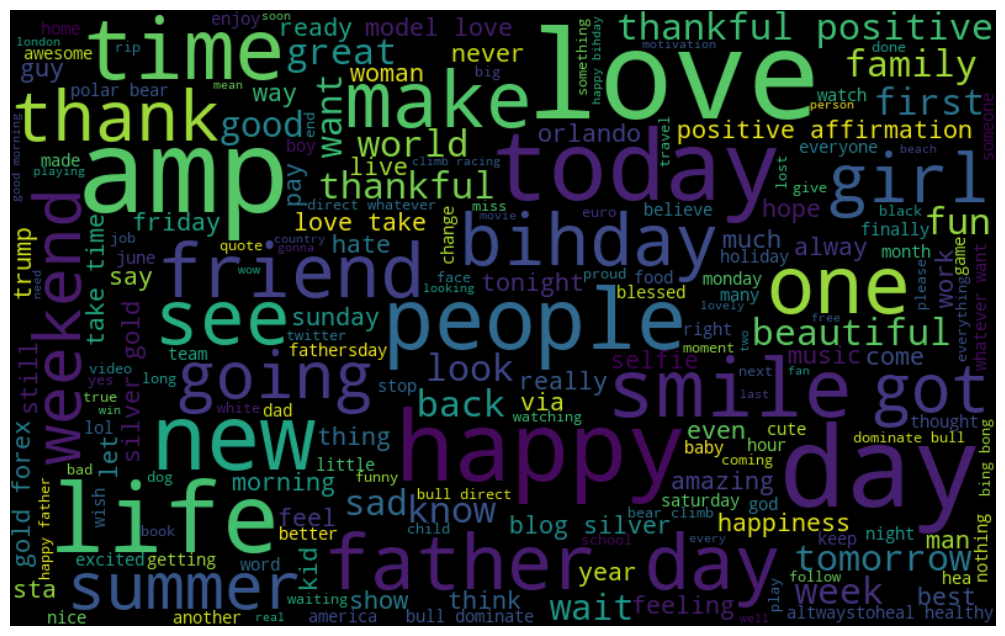

In [38]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in data['clean']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

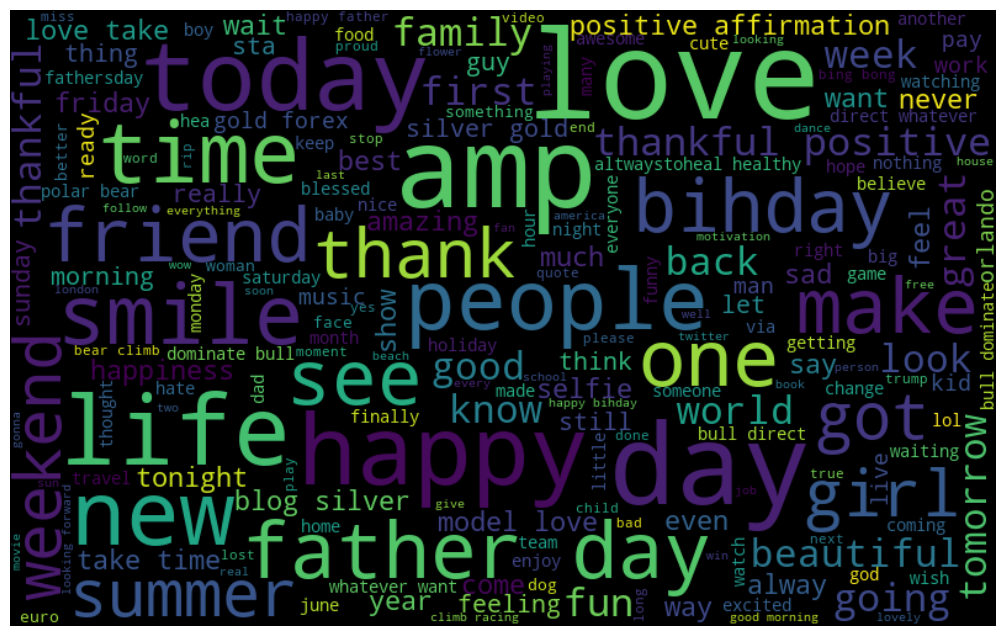

In [39]:
# visualize the frequent positive words
all_words = " ".join([sentence for sentence in data['clean'][data['label']=='0']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

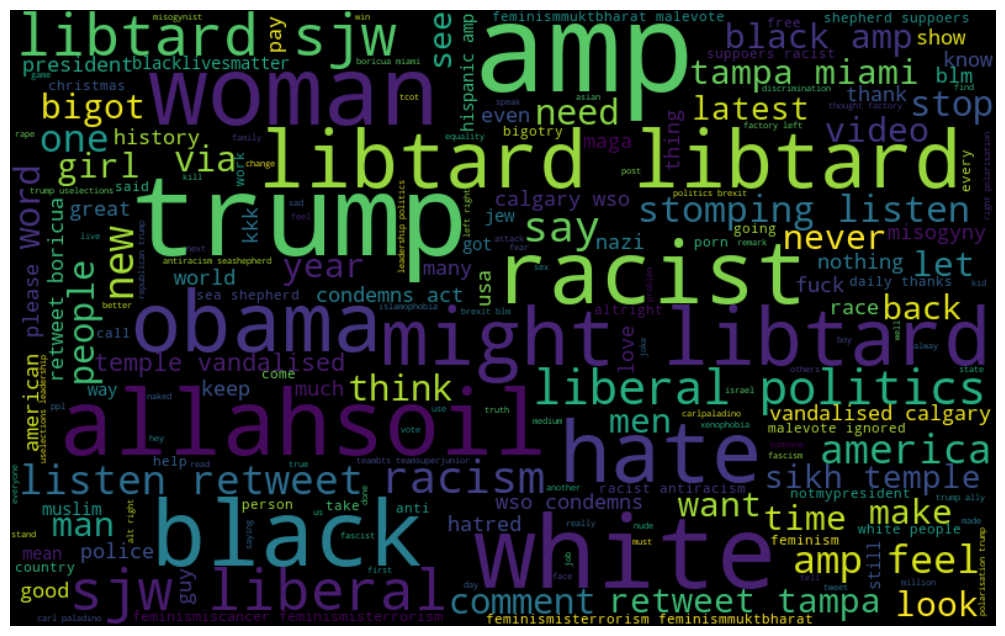

In [40]:
# visualize the frequent negative words
all_words = " ".join([sentence for sentence in data['clean'][data['label']=='1']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags    

In [42]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(data['clean'][data['label']=='0'])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(data['clean'][data['label']=='1'])

In [43]:
ht_negative[:3]

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphins',
  'thecove',
  'helpcovedolphins'],
 []]

In [44]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [45]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,34
1,lyft,2
2,disapointed,1
3,getthanked,2
4,model,365


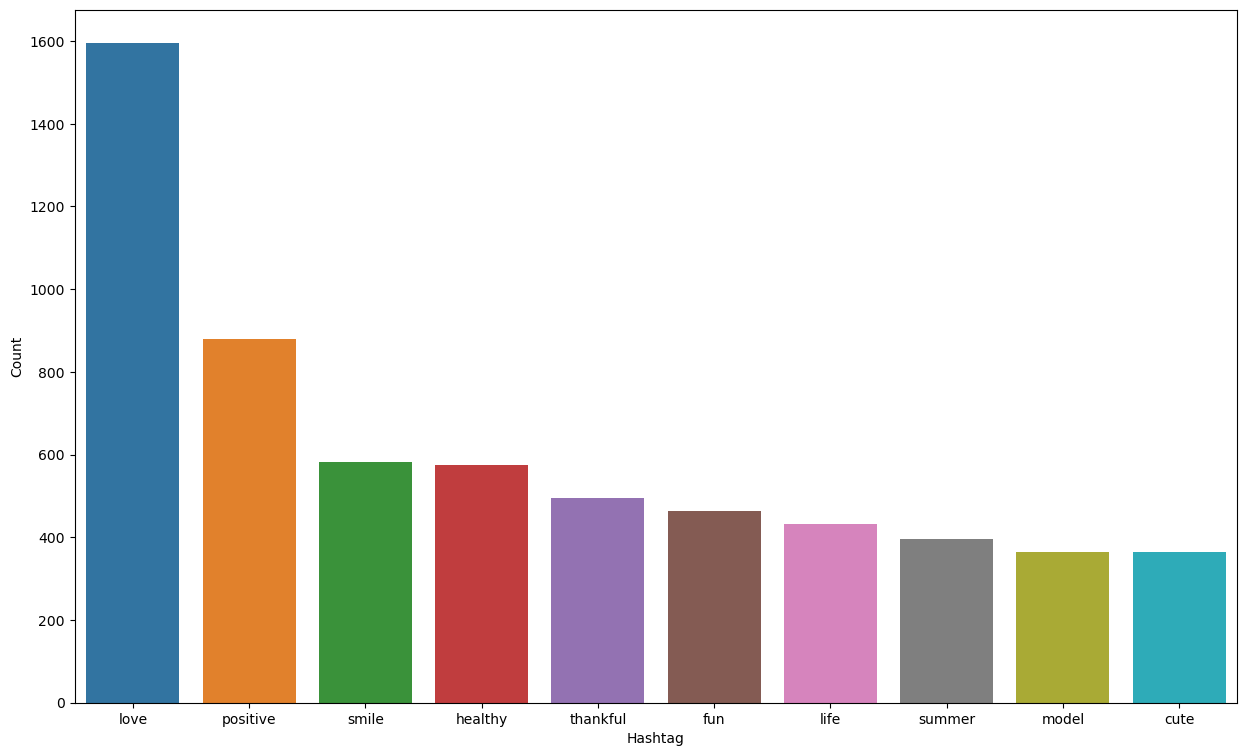

In [46]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [47]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


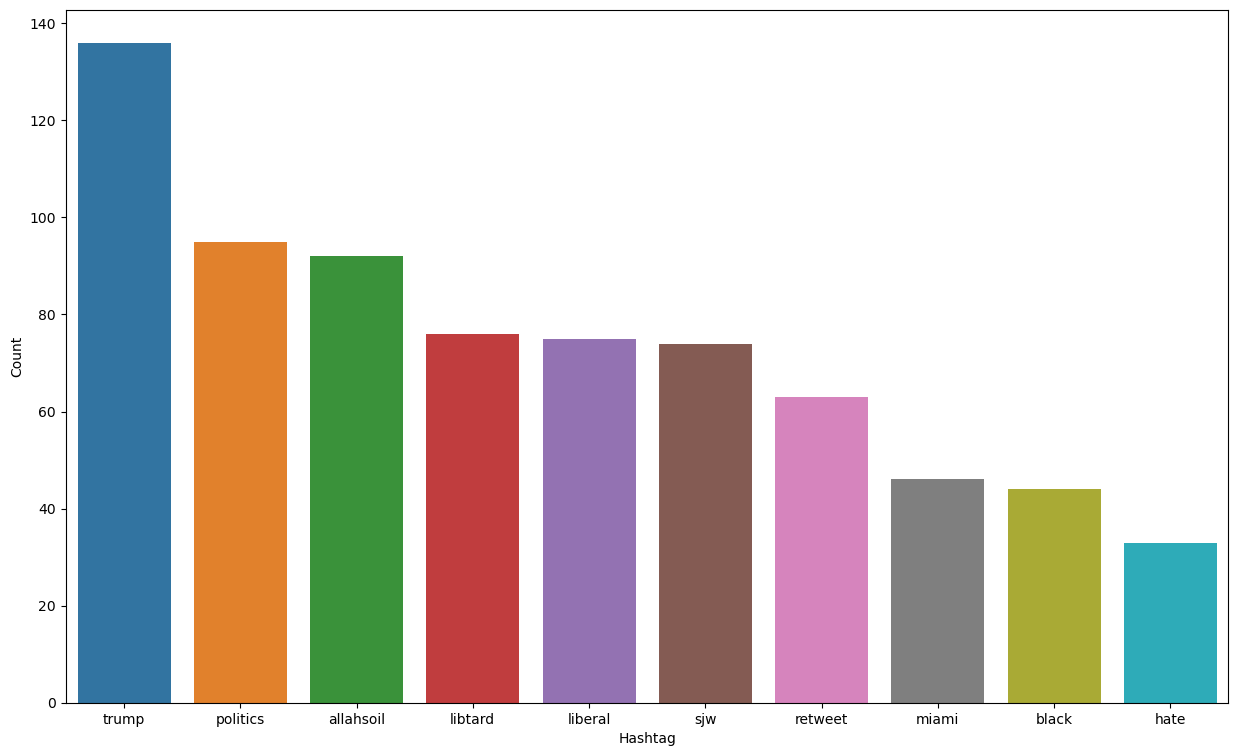

In [48]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

# Feature extraction

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(data['clean'])

In [50]:
#bow[1].toarray()
data['label']=data['label'].astype(int)
data['label'].dtype

dtype('int32')

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, data['label'], random_state=42, test_size=0.25)

# Model Training

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [53]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [54]:
pred=model.predict(x_test)

In [55]:
def Model_Result(actual,pred):
    confusion=pd.crosstab(actual,pred)
    print(confusion)
    print('\n')
    print("**********************************************************")
    from sklearn.metrics import precision_score,f1_score,recall_score,classification_report
    print('Accuracy -',(sum(np.diagonal(confusion))/x_test.shape[0])*100)
    print("Recall -",recall_score(actual,pred))
    print("Precision -",precision_score(actual,pred))
    print("F1 Score -",f1_score(actual,pred))
    print("**********************************************************")
    print('\n Classification Report -\n',classification_report(actual,pred))


In [56]:
Model_Result(y_test,pred)

col_0     0    1
label           
0      7371   61
1       364  195


**********************************************************
Accuracy - 94.68151670629457
Recall - 0.3488372093023256
Precision - 0.76171875
F1 Score - 0.47852760736196315
**********************************************************

 Classification Report -
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      7432
           1       0.76      0.35      0.48       559

    accuracy                           0.95      7991
   macro avg       0.86      0.67      0.73      7991
weighted avg       0.94      0.95      0.94      7991



# Naive Bayes Model

In [57]:
model2=GaussianNB()
model2.fit(x_train.toarray(), y_train)

GaussianNB()

In [58]:
pred2=model2.predict(x_test.toarray())

In [59]:
Model_Result(y_test,pred2)

col_0     0     1
label            
0      3812  3620
1        39   520


**********************************************************
Accuracy - 54.210987360780884
Recall - 0.9302325581395349
Precision - 0.12560386473429952
F1 Score - 0.22132368589061502
**********************************************************

 Classification Report -
               precision    recall  f1-score   support

           0       0.99      0.51      0.68      7432
           1       0.13      0.93      0.22       559

    accuracy                           0.54      7991
   macro avg       0.56      0.72      0.45      7991
weighted avg       0.93      0.54      0.64      7991

